#Applying Linear Regression using Neural Networks (Tensorflow)

In [ ]:
!pip install -q sklearn
%tensorflow_version 2.x

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving OulierRemoved_All_Parameter_Data.csv to OulierRemoved_All_Parameter_Data.csv


In [ ]:
df = pd.read_csv('OulierRemoved_All_Parameter_Data.csv')
df = df.drop(['SUPPY_FAN_SPEED', 'EXHAUST_FANSPEED', 'MOISTURE_CONTENT '], axis = 1)

In [ ]:
df.describe()

,CHAMBER_EXT_TEMP,CHAMBER_OUTLET_TEMP,CHAMBER_TEMP,CHAMBER_VACCUM,CONCT1TEMP,CONCT2TEMP,COOLING_TEMP,CYCLON_VACCUM,FBD_COOLING_TEMP,FBD_HOT_AIR_TEMP,FBD_VACCUM,FEED_PUMP_DENSITY,FEED_PUMP_FLOW,HIGH_PRESSURE_PUMP,INLET_CHILDWTR_TEMP,PRE_HEATING_TEMP,RECYCLE_PRESSURE,RECYCLE_TEMP,TOP_HOT_AIR_TEMP
count,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000
mean,85.085542,89.908707,183.311483,-11.045717,33.627933,40.430477,53.769804,187.030540,18.766604,92.248000,-6.680896,1.183667,1025.605623,167.844012,3.675269,53.554578,0.428584,53.253131,185.216837
std,1.551513,1.660718,1.721722,2.496462,3.961107,9.992564,4.440072,7.995370,1.304027,0.519326,2.445934,0.003006,46.640036,18.924465,1.358029,2.049243,0.019922,2.034379,1.816522
min,80.400002,84.800003,178.300003,-17.970169,22.700001,23.500000,42.900002,163.670563,14.800000,90.900002,-13.255508,1.176159,883.657600,111.867706,0.600000,47.799999,0.373600,47.299999,180.300000
25%,84.000000,88.699997,182.100006,-12.717255,30.400000,30.100000,50.599998,181.232162,17.799999,91.900002,-8.261993,1.181456,990.933800,155.123215,2.600000,52.200001,0.417100,51.900002,183.899990
50%,85.000000,89.800003,183.300003,-11.091100,33.599998,48.000000,52.500000,186.874191,18.700001,92.216000,-6.718552,1.183837,1010.545000,165.985733,3.600000,53.500000,0.428000,53.299999,185.200000
75%,86.099998,91.000000,184.500000,-9.383919,37.000000,49.700001,57.000000,192.892349,19.600000,92.599998,-5.058365,1.185781,1056.654000,180.415039,4.500000,54.799999,0.441800,54.700001,186.500000
max,90.000000,95.199997,188.199997,-4.189369,42.400002,56.599998,65.199997,210.453949,22.700001,93.599998,-0.181580,1.191515,1154.708000,221.757462,7.800000,59.299999,0.484300,58.700001,190.399990


In [ ]:
train_dataset = df.sample(frac=0.7, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CHAMBER_EXT_TEMP')
test_labels = test_features.pop('CHAMBER_EXT_TEMP')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))


In [ ]:
model = keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(keras.layers.Dense(11784, activation='relu'))
# Add another:
model.add(keras.layers.Dense(11784/2, activation='relu'))
model.add(keras.layers.Dense(11784/4, activation='relu'))
model.add(keras.layers.Dense(11784/8, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(
    test_features, test_labels, verbose=0, return_dict = True)

{'loss': 84.9985580444336}

In [ ]:
def build_compile(norm):
  model = keras.Sequential()
  model.add(keras.layers.Dense(256, activation = 'relu'))
  model.add(keras.layers.Dense(128, activation = 'relu'))
  model.add(keras.layers.Dense(1))
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model


In [ ]:
model = build_compile(normalizer)

In [ ]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=55)

CPU times: user 27.6 s, sys: 2.39 s, total: 30 s
Wall time: 22.4 s


In [ ]:
model.evaluate(test_features, test_labels, verbose=0, return_dict = True)

{'loss': 0.626574695110321, 'root_mean_squared_error': 0.7915647029876709}

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_loss(history):
  plt.figure(figsize=(14,12))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CHAMBER EXT TEMP]')
  plt.legend()
  plt.grid(True)

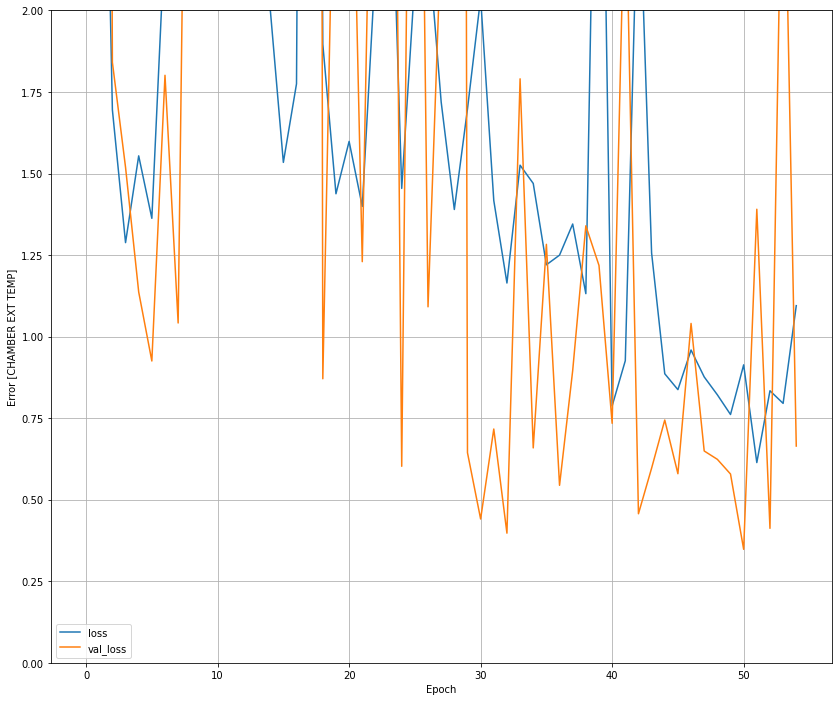

In [ ]:
plot_loss(history)

In [ ]:
y_pred = model.predict(test_features)
y_true = test_labels

In [ ]:
len(y_true)

3535

In [ ]:
y_true.dtype

dtype('float64')

In [ ]:
y_pred.dtype

dtype('float32')

In [ ]:
residual = tf.reduce_sum(tf.square(tf.subtract(y_true,y_pred)))

In [ ]:
total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))

In [ ]:
r2 = tf.subtract(1.0, tf.divide(residual, total))
r2

<tf.Tensor: shape=(), dtype=float64, numpy=-6742.827128845117>

In [ ]:
sess = tf.Session()
a = sess.run(r2)
print('R Square parameter: ',a)

AttributeError: ignored

In [ ]:
def plot(y_true, y_pred):
  plt.figure(figsize = (14,12))
  plt.plot(y_true, label = 'True')
  plt.plot(y_pred, label = 'Predicted')
  plt.ylim([80,100])
  plt.xlim([0,3535])
  plt.xlabel('DataPoint')
  plt.ylabel('Output')
  plt.legend()
  

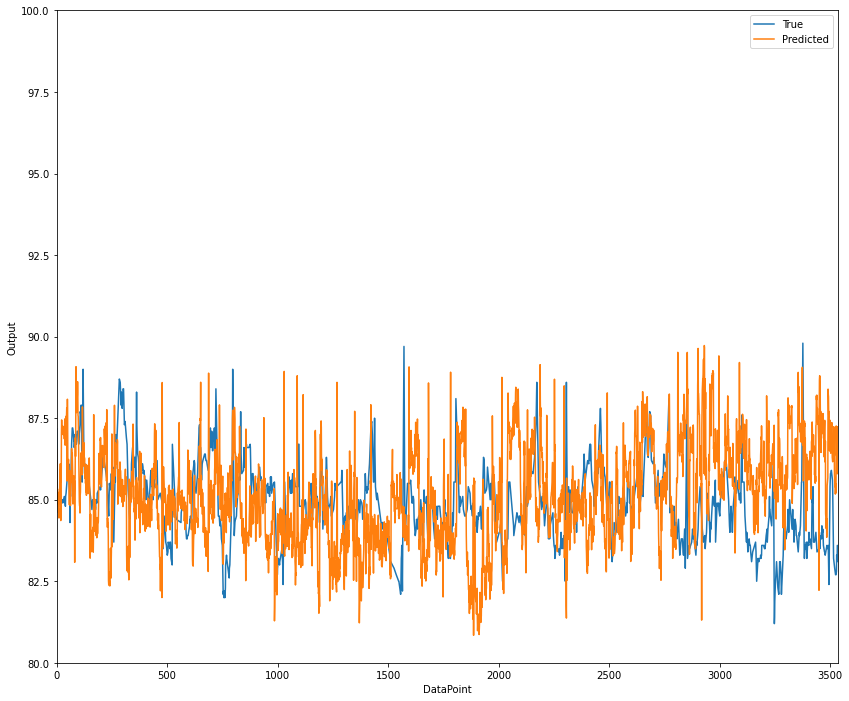

In [ ]:
plot( y_true,y_pred)

In [ ]:
ex = pd.DataFrame()

In [ ]:
ex['True'] = y_true
ex['Predicted'] = y_pred

In [ ]:
ex.to_csv('True_Predicted.csv')

In [ ]:
ex['subtraction'] = ex['True'] - ex['Predicted']
ex['subtraction'] = ex['subtraction']*ex['subtraction']
r = sum(ex['subtraction'])


In [ ]:
rss = r

In [ ]:
s = 0
m = ex['True'].mean()
for i in ex['True']:
  s += (i-m)**2
tss = s/3535

In [ ]:
rss/=3535

In [ ]:
r2 = 1 - (rss/tss)

In [ ]:
r2

0.9481787932770857

In [ ]:
model.save('Final_Model')

INFO:tensorflow:Assets written to: Final_Model/assets


In [ ]:
nmodel = tf.keras.models.load_model('Final_Model')

In [ ]:
nmodel.evaluate(test_features, test_labels, verbose=0, return_dict = True)

{'loss': 0.12875781953334808, 'root_mean_squared_error': 0.3588283956050873}

In [ ]:
!zip -r /content/Final_Model.zip /content/Final_Model


  adding: content/Final_Model/ (stored 0%)
  adding: content/Final_Model/saved_model.pb (deflated 88%)
  adding: content/Final_Model/keras_metadata.pb (deflated 86%)
  adding: content/Final_Model/assets/ (stored 0%)
  adding: content/Final_Model/variables/ (stored 0%)
  adding: content/Final_Model/variables/variables.index (deflated 62%)
  adding: content/Final_Model/variables/variables.data-00000-of-00001 (deflated 68%)


In [ ]:
files.download("Final_Model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def plotyvy(ytrue, ypred):
  plt.plot(ytrue, ypred, 'o', color='red')

In [ ]:
y_pred = nmodel.predict(test_features)
y_true = test_labels

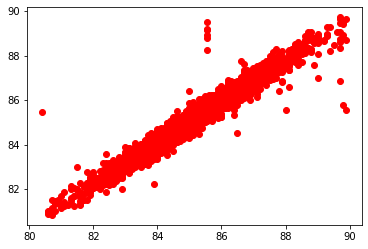

In [ ]:
plotyvy(y_true, y_pred)

#Applying Classification Algorithms on Faulty Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()

Saving Final_Shuffle.csv to Final_Shuffle.csv


In [ ]:
df = pd.read_csv('Final_Shuffle.csv')

In [ ]:
labels = df['target']

In [ ]:
features = df.drop('target', axis = 1)

In [ ]:
features = features.drop('Unnamed: 0', axis = 1)

In [ ]:
features

,TOP_HOT_AIR_TEMP,CHAMBER_EXT_TEMP,CHAMBER_OUTLET_TEMP,FEED_PUMP_FLOW
0,183.80000,84.800003,89.599998,1008.2100
1,184.80000,85.500000,89.800003,1030.1560
2,188.20000,85.400002,90.500000,1050.9340
3,199.70000,84.500000,89.500000,1082.1010
4,189.30000,83.699997,88.300003,892.4900
...,...,...,...,...
21779,185.89999,83.900002,88.800003,910.9340
21780,186.20000,84.800003,89.699997,1038.2100
21781,182.60001,83.699997,88.599998,998.9883
21782,186.80000,81.599998,86.199997,1049.7660


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# confusion_matrix(y_test, clf.predict(X_test))

In [ ]:
classifiers = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC()]
ls = []
for clf in classifiers:
  clf.fit(X_train, y_train)
  ls.append(accuracy_score(y_test, clf.predict(X_test)))
# for i,j in ls, classifiers:
#   print(j)
#   print(i)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
classifier = ['RandomForest', 'DecisionTree', 'LogisticRegression', 'SVC']

In [ ]:
accuracy = {}
for i in range(len(ls)):
  accuracy[classifier[i]] = ls[i]

In [ ]:
accuracy

{'DecisionTree': 0.998347410943812,
 'LogisticRegression': 0.9959603378626515,
 'RandomForest': 0.998347410943812,
 'SVC': 0.9540947484392215}

In [ ]:
ls

[array([[2967,    0,    0,    0,    6],
        [   0,  610,    0,    0,    0],
        [   0,    0,  589,    0,    0],
        [   0,    0,    0,  663,    0],
        [   2,    0,    0,    0,  609]]),
 array([[2968,    0,    0,    0,    5],
        [   0,  610,    0,    0,    0],
        [   0,    0,  589,    0,    0],
        [   0,    0,    0,  663,    0],
        [   3,    0,    0,    0,  608]]),
 array([[2963,    4,    0,    0,    6],
        [   3,  603,    0,    0,    4],
        [   0,    0,  589,    0,    0],
        [   0,    0,    0,  663,    0],
        [   3,    2,    0,    0,  606]]),
 array([[2950,    0,    0,    0,   23],
        [ 216,  391,    0,    0,    3],
        [   0,    0,  585,    0,    4],
        [   0,    0,    0,  659,    4],
        [   0,    0,    0,    0,  611]])]

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [('lr', classifiers[2]), ('rf', classifiers[0]), ('svc', classifiers[-1])],
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)
accuracy_score(y_test, voting_clf.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9972456849063532

In [ ]:
accuracy['VotingClassifier'] = accuracy_score(y_test, voting_clf.predict(X_test))

In [ ]:
ds

{'DecisionTree': array([[2968,    0,    0,    0,    5],
        [   0,  610,    0,    0,    0],
        [   0,    0,  589,    0,    0],
        [   0,    0,    0,  663,    0],
        [   3,    0,    0,    0,  608]]),
 'LogisticRegression': array([[2963,    4,    0,    0,    6],
        [   3,  603,    0,    0,    4],
        [   0,    0,  589,    0,    0],
        [   0,    0,    0,  663,    0],
        [   3,    2,    0,    0,  606]]),
 'RandomForest': array([[2967,    0,    0,    0,    6],
        [   0,  610,    0,    0,    0],
        [   0,    0,  589,    0,    0],
        [   0,    0,    0,  663,    0],
        [   2,    0,    0,    0,  609]]),
 'SVC': array([[2950,    0,    0,    0,   23],
        [ 216,  391,    0,    0,    3],
        [   0,    0,  585,    0,    4],
        [   0,    0,    0,  659,    4],
        [   0,    0,    0,    0,  611]]),
 'VotingClassifier': array([[2964,    0,    0,    0,    9],
        [   4,  605,    0,    0,    1],
        [   0,    0,  589,    0

In [ ]:
accuracy

{'DecisionTree': 0.998347410943812,
 'LogisticRegression': 0.9959603378626515,
 'RandomForest': 0.998347410943812,
 'SVC': 0.9540947484392215,
 'VotingClassifier': 0.9972456849063532}